In [3]:
from cvxpy import *
import numpy as np



# Problem 1. Solution

We have an optimization problem

\begin{align}
\text{minimize}\hspace{8mm}2x_1 + 3|x_2-10|\\
\text{subject to}\hspace{5mm}|x_1+2|+|x_2|\leq 5
\end{align}
It can be easily seen that in case $x_2\geq 10$ there are no feasible points, so we can rewrite our optimization problem as follows

\begin{align}
\text{minimize}\hspace{10mm}2x_1 - 3x_2 + 30\\
\text{subject to}\hspace{5mm} |x_1+2|+|x_2|\leq 5
\end{align}

Now we can rewrite our optimization problem as minimum of optimal values of the following optimization problems

* \begin{align}
\text{minimize}\hspace{6mm}2x_1 - 3x_2 + 30\\
\text{subject to}\hspace{7mm}-x_1 - x_2\leq 7\\
x_1 \leq -2\\
x_2 \leq 0
\end{align}



* \begin{align}
\text{minimize}\hspace{6mm}2x_1 - 3x_2 + 30\\
\text{subject to}\hspace{12mm}x_1 - x_2\leq 3\\
x_1 \geq -2\\
x_2 \leq 0
\end{align}



* \begin{align}
\text{minimize}\hspace{6mm}2x_1 - 3x_2 + 30\\
\text{subject to}\hspace{7mm}-x_1 + x_2\leq 7\\
x_1 \leq -2\\
x_2 \geq 0
\end{align}



* \begin{align}
\text{minimize}\hspace{6mm}2x_1 - 3x_2 + 30\\
\text{subject to}\hspace{12mm}x_1 + x_2\leq 3\\
x_1 \geq -2\\
x_2 \geq 0
\end{align}

All of this optimization problems can be rewritten in standard form. For example, setting $y_1 = -2-x_1$, $y_2 = -x_2$ and $c = (-2,3)$ we can rewrite the first optimization problem in the following way

\begin{align}
\text{minimize}\hspace{10mm}c^Ty+26\\
\text{subject to}\hspace{4mm}y_1+y_2\leq 5\\
y_1,y_2\geq 0
\end{align}

Analogically, we can make the same for others problems by taking. So we obtain

\begin{align}
\text{minimize}\hspace{10mm}c^Ty+26\\
\text{subject to}\hspace{4mm}y_1+y_2\leq 5\\
y_1,y_2\geq 0\\
c = (\pm2,\pm3)
\end{align}

Hence we have 4 LP problems.

In [3]:
y = Variable(2)

In [4]:
constr = [y[0] >= 0, y[1] >= 0, y[0]+y[1] <= 5]

obj = []

obj.append(-2 * y[0] + 3 * y[1] + 26)
obj.append(2 * y[0] + 3 * y[1] + 26)
obj.append(-2 * y[0] - 3 * y[1] + 26)
obj.append(2 * y[0] - 3 * y[1] + 26)

prob_value = []
prob_solution = []

for i in range(4):
    objective = Minimize(obj[i])
    prob = Problem(objective, constr)
    prob.solve()
    prob_value.append(prob.value)
    prob_solution.append(y.value)
    
opt_value = min(prob_value)
opt_solution = prob_solution[prob_value.index(opt_value)]

In [5]:
print 'Optimal value', opt_value, ', Case', prob_value.index(opt_value)

print opt_solution

Optimal value 11.0000000183 , Case 3
[[  6.53046856e-10]
 [  4.99999999e+00]]


We now that there are some errors, so the optimal solution is  $x= (-2, 5)$ and the optimal value is $11$.

# Problem 2. Solution

We have an optimization problem

$$\text{minimize}\hspace{6mm} \sum_{i=1}^n \left|A_i^Tp - I_i^* \right|$$
$$\text{subject to}\hspace{20mm} p\geq0$$

where $p,a_i\in\mathbb{R}^m$

If we suppose that $Ap\geq I^*$, then the objective function can be rewritten as

$$\sum_{i=1}^n \left|A_i^Tp - I_i^* \right| = \sum_{i=1}^n \left(\sum_{j=1}^mA_{ij}p_j - I_i^*\right) = \sum_{i=1}^n \sum_{j=1}^mA_{ij}p_j - \sum_{i=1}^nI_i^* = \sum_{j=1}^m\sum_{i=1}^nA_{ij}p_j - \sum_{i=1}^nI_i^* = \sum_{j=1}^mp_j\left(\sum_{i=1}^nA_{ij}\right)-\sum_{i=1}^nI_i^*$$

Summand $\sum_{i=1}^nI_i^*$ is a constant, multiplier $(\sum_{i=1}^nA_{ij})$ is a positive constant, so we can reformulate our optimisation problem as follows

\begin{align}
\text{minimize}\hspace{10mm} \sum_{j=1}^m p_j\\
\text{subject to}\hspace{6mm} Ap\geq I^*\\
p\geq0
\end{align}

It is a LP problem. This case is most suitable for real life, because it is better to make $I\geq I^*$ than $I<I^*$.

In [10]:
n, m = 5, 6

In [11]:
np.random.seed(1)
A = np.random.rand(n, m)
I_star = np.random.rand(n, 1)


In [16]:
p = Variable(m)

objective = Minimize(sum_entries(p))
constraints = [A * p - I_star >= 0, p >= 0]
prob = Problem(objective, constraints)
prob.solve()

I = A * p.value

print 'Difference', np.abs(I - I_star).sum()
prob.value
p.value

Difference 0.687933312799


matrix([[ -2.00160417e-11],
        [  7.94530754e-01],
        [ -1.90403464e-11],
        [  3.88084758e-01],
        [ -3.13360856e-12],
        [  1.10289759e-10]])

Generally speaking, we have $n$ modules, so we have $2^n$ variants of reducing our optimization problem to LP one. More precisely, for any set 

$$L = \left\{l_1,l_2,\dots,l_k\ \big|\  0\leq k\leq n, 1\leq l_i \leq n\right\}$$

we can solve an optimization problem

$$\text{minimize}\hspace{10mm} \sum_{i\notin L}(a_i^Tp - I^*_i) + \sum_{i\in L}(I^*_i - a_i^Tp)$$
\begin{align}
\text{subject to}\hspace{37mm} a_i^Tp \geq I_i^*\ i\notin L\\
a_i^Tp \leq I_i^*\ i\in L\\
p\geq0
\end{align}

It is easy to understand that for $L$ there are $2^n$ different variants: we can take number $l$ ($1\leq l\leq n$) to it or not. Hence solving all of problems and taking minimum of all obtained optimal values we can find an optimal solution for original problem.

In [17]:
p = Variable(m)

objective = Minimize(norm(A * p - I_star, 1))
constraints = [p >= 0]
prob = Problem(objective, constraints)
prob.solve()

I = A * p.value

print 'Difference', np.abs(I - I_star).sum()
p.value

Difference 0.610709262458


matrix([[  1.22058008e-10],
        [  3.74673470e-02],
        [  1.12073891e-10],
        [  7.14341638e-03],
        [  3.49994865e-10],
        [  7.49399543e-01]])

In [20]:
print A.dot(p.value) >= I_star

[[ True]
 [ True]
 [False]
 [False]
 [False]]


Hence we see that we can find a solution with less difference $\|I - I^*\|_1$, but on some parts of the road offered lightning will be worse than desired one. And it is not cool.

# Problem 3. Solution

## a)

Let $p_1$ and $p_2$ be an amount of product 1 and product 2, respectively. Set

$$Pr(p_1,p_2) = 9p_1+8p_2-1.2p_1-0.9p_2 = 7.8p_1+7.1p_2$$

be a function of profit depending on amount of products. So we have an optimization problem

\begin{align}
\text{maximize}\hspace{19mm}Pr(p_1,p_2)\\
\text{subject to}\hspace{6mm}\frac{1}{4}p_1+\frac{1}{3}p_2\leq 90\\
\frac{1}{8}p_1+\frac{1}{3}p_2\leq 80\\
p_1,p_2\geq0
\end{align}

In [9]:
p = Variable(2)

objective = Maximize(7.8 * p[0] + 7.1 * p[1])
constraints = [p >= 0, 1.0 / 4 * p[0] + 1.0 / 3 * p[1] <= 90, 1.0 / 8 * p[0] + 1.0 / 3 * p[1] <= 80]
prob = Problem(objective, constraints)

profit = prob.solve()
raw_mat = 1.2 * p[0].value + 0.9 * p[1].value
amount = p.value
print amount

print 'Profit', profit, ', Raw materials', raw_mat

[[  3.59999996e+02]
 [  3.26239654e-06]]
Profit 2807.99998825 , Raw materials 431.999997565


## b) i

This problem can be easily reformulated as LP problem in the following way. Let $\omega$ be a number of overtime labor ours. Then our profit function will be

$$Pr(p_1,p_2,\omega) = 7.8p_1+7.1p_2-7\omega$$

And our optimization problem will be 

\begin{align}
\text{maximize}\hspace{28mm}Pr(p_1,p_2)\\
\text{subject to}\hspace{6mm}\frac{1}{4}p_1+\frac{1}{3}p_2\leq 90+\omega\\
\frac{1}{8}p_1+\frac{1}{3}p_2\leq 80\\
\omega\leq 50\\
p_1,p_2,\omega\geq 0
\end{align}

In [8]:
p = Variable(2)
overtime = Variable()

objective = Maximize(7.8 * p[0] + 7.1 * p[1] - 7 * overtime)
constraints = [p >= 0, 1.0 / 4 * p[0] + 1.0 / 3 * p[1] <= 90 + overtime, 1.0 / 8 * p[0] + 1.0 / 3 * p[1] <= 80, overtime >= 0, overtime <= 50]
prob = Problem(objective, constraints)

profit = prob.solve()
amount = p.value
print amount
print 'Profit', profit

[[  5.59999999e+02]
 [  4.04503846e-07]]
Profit 4017.99999792


# b) ii

To find the optimal solution of (3b.ii), we can find the optimal solution of (3a), and if the cost of materials will be more than $300$, it is clear that with the discount, we will increase our profit, spending not more money on materials.

In our case, cost of raw materials is raw_mat=431, so we can consider the case, when 

$$raw\_mat = 0.9(1.2p_1+0.9p_2)$$

and solve original optimization  problem.

In [97]:
# Discount for all raw_mat

p = Variable(2)

objective = Maximize(7.92 * p[0] + 7.19 * p[1])
constraints = [p >= 0, 1.0 / 4 * p[0] + 1.0 / 3 * p[1] <= 90, 1.0 / 8 * p[0] + 1.0 / 3 * p[1] <= 80]
prob = Problem(objective, constraints)

profit = prob.solve()
raw_mat = 0.9 * (1.2 * p[0].value + 0.9 * p[1].value)
print p.value, ' ', profit, ' ', raw_mat

[[  3.59999996e+02]
 [  3.00091769e-06]]   2851.1999889   388.799997975


We can see that this result can be obtained by solving original problem and then adding $10%$ of raw materials cost to profit

In [17]:
2807.99998825 + 0.1 * 431.999997565

2851.1999880065

# Problem 4

## a)

We have an optimization problem

\begin{align}
\text{minimize}\hspace{6mm}-2x_1-x_2\\
\text{subject to}\hspace{5mm} x_1-x_2\leq 2\\
x_1+x_2\leq 6\\
x_1,x_2,\geq 0
\end{align}

We can rewrite it in standard form

\begin{align}
\text{maximize}\hspace{20mm} 2x_1+x_2\\
\text{subject to}\hspace{5mm}  x_1-x_2+x_3 =  2\\
x_1+x_2+x_4 =  6\\
x_1,x_2,x_3,x_4\geq 0
\end{align}
Set $z = 2x_1+x_2$. Basic feasible solution of this problem will be

$$(x_3,x_4,z) = (2,6,0)$$

## b)

* First step

\begin{array}{l|c} 
&x_1 & x_2 & x_3 &x_4 & z & \text{sol}\\ \hline
x_1&1   & -1  &  1  &  0 & 0 & 2\\ \hline
x_2&1   &  1  &  0  &  1 & 0 & 6\\ \hline
z&-2  &  -1 &  0  &  0 & 1 & 0
\end{array}

* Second step

\begin{array}{l|c} 
&x_1 & x_2 & x_3 &x_4 & z & \text{sol}\\ \hline
x_1&1   & -1  &  1  &  0 & 0 & 2\\ \hline
x_2&0   &  2  &  -1 &  1 & 0 & 4\\ \hline
z&0   &  -3 &  2  &  0 & 1 & 4
\end{array}

* Final step

\begin{array}{l|c} 
&x_1 & x_2 & x_3            &x_4           & z   & \text{sol}\\ \hline
x_1&1   &  0  &  \frac{1}{2}   &  \frac{1}{2} & 0 & 4\\ \hline
x_2&0   &  1  &  -\frac{1}{2}  &  \frac{1}{2} & 0 & 2\\ \hline
z&0   &  0  &  \frac{1}{2}   &  \frac{3}{2} & 1 & 10
\end{array}

So we have an oplimal solution $x = (4,2)$, where $z = 10$.

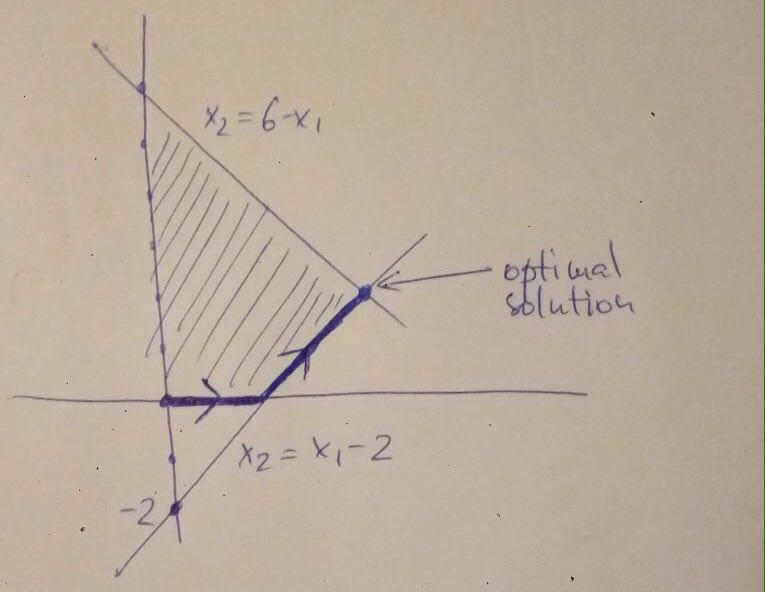

In [1]:
from IPython.display import Image
Image("/Users/Evgeny/Opt. methods/1.png")